Data Preparation
1. Map info of Porto
2. Retrieve first 1500data of train


In [1]:
import osmnx as ox
import time
from shapely.geometry import Polygon
import os
import numpy as np

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)

    # We need an unique ID for each edge
    gdf_edges["fid"] = np.arange(0, gdf_edges.shape[0], dtype='int')

    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)

osmnx version 1.9.4


C:\Users\perry\AppData\Local\Temp\ipykernel_13256\3191099155.py:20: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
C:\Users\perry\AppData\Local\Temp\ipykernel_13256\3191099155.py:28: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)


--- 98.06883978843689 seconds ---


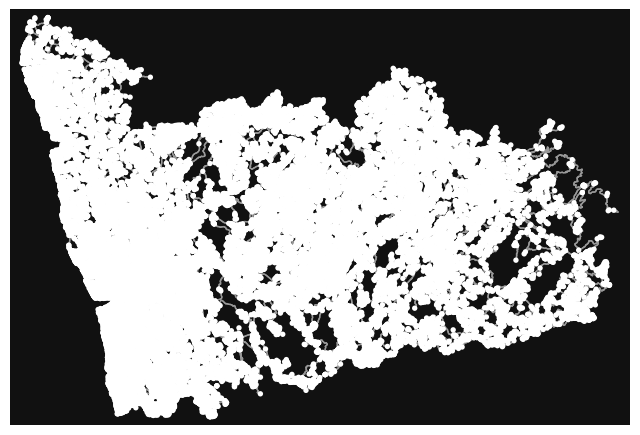

In [2]:
place ="Porto, Portugal"

start_time = time.time()
G = ox.graph_from_place(place, network_type='drive', which_result=2)

save_graph_shapefile_directional(G, filepath='./data/porto')
print("--- %s seconds ---" % (time.time() - start_time))

ox.plot_graph(G)
ox.save_graphml(G)

In [3]:
import pandas as pd

# Read the dataset

df_1500 = pd.read_csv('kraggle_data/train/train.csv', nrows = 1500)
train_1500 = pd.DataFrame(df_1500)
df_1500.to_csv('data/train-1500.csv', index=False)